# 1. Understanding Data

In [13]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import seaborn as sns
import matplotlib as plt

import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
df = pd.read_csv('data/Train.csv')
df_Test = pd.read_csv('data/Train.csv')

# Basline Model 

### Correlation of Features

In [15]:
# Function to get number density columns
def get_number_density_columns(df):
    return [
        col for col in df.columns 
        if "column_number_density" in col and "tropospheric" in col
    ]

In [16]:
cols = get_number_density_columns(df)
print(cols)


['L3_NO2_tropospheric_NO2_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf']


In [17]:
selected_cols = ["Place_ID", "target", "temperature_2m_above_ground", "u_component_of_wind_10m_above_ground",
 'v_component_of_wind_10m_above_ground','L3_NO2_tropospheric_NO2_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf']
df_selected = df[selected_cols]  

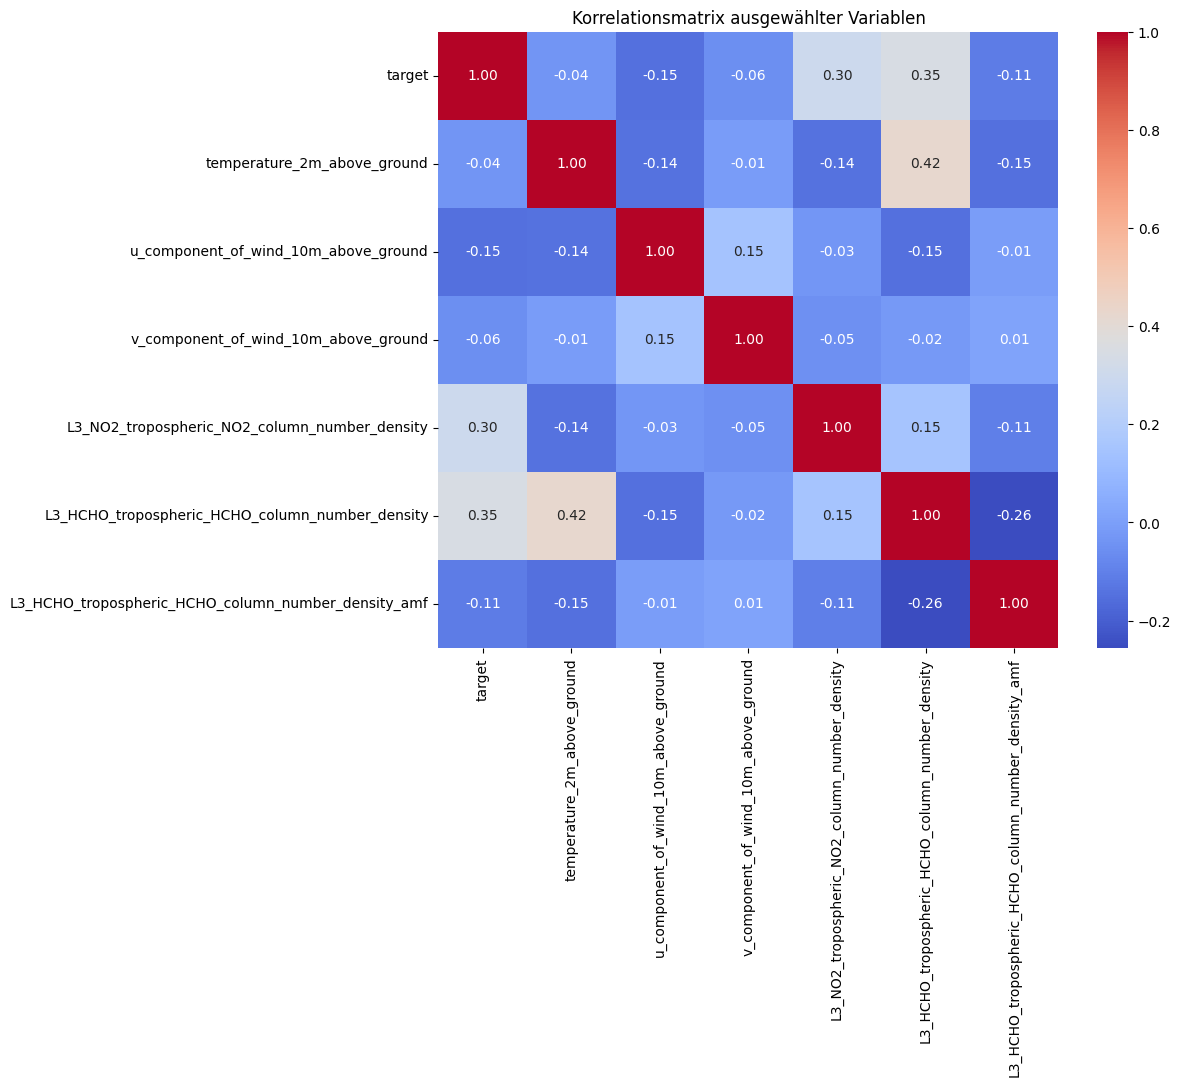

In [18]:
# Plot correlation matrix   
corr = df_selected.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix ausgewählter Variablen")
plt.show()

### Features and Train/ Test-Split

In [19]:
features = [
    'temperature_2m_above_ground',
    'u_component_of_wind_10m_above_ground',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density'
]
X = df[features]
y = df['target']

In [20]:
X.isnull().sum() * 100 / len(X)

temperature_2m_above_ground                         0.000000
u_component_of_wind_10m_above_ground                0.000000
L3_NO2_tropospheric_NO2_column_number_density      28.369932
L3_HCHO_tropospheric_HCHO_column_number_density    24.298851
dtype: float64

In [21]:
# fill missing values with mean
X = X.fillna(X.mean())

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 31.006014923777254
R^2 Score: 0.16777499542937646


In [24]:
# The baseline linear regression model explains around 16% of the variance in the target variable.

# Filtering the data

In [27]:
def data_filter(df):

    return df.loc[:, ~((df.columns.str.startswith('L3')) & (~df.columns.str.contains('column_number_density')))]

df_filtered = data_filter(df)
df_filtered.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,0.000017,0.119095,0.021080,883.332451,-0.000010,0.000064,0.566828,-0.000127,0.312521,-0.000040
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,0.000021,0.115179,0.022017,1148.985447,0.000114,0.000171,0.858446,0.000150,0.433957,0.000050
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,0.000007,0.115876,0.020677,1109.347101,0.000027,0.000124,0.910536,0.000150,0.356925,0.000053
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,0.000023,0.141557,0.021207,1061.570832,0.000023,0.000081,1.132571,0.000227,0.584522,0.000110
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.000009,0.126369,0.037766,1044.247425,0.000037,0.000140,0.649359,0.000390,0.408047,0.000159
